<a href="https://colab.research.google.com/github/sharonwanjiru/NLPProject/blob/main/Latestcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.filterwarnings('ignore')
import nltk
#nltk.download('all')
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import spacy

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
exclude_list = ['but','no','because','against','not','than']
stop_words = set(stopwords.words('english'))
stop_words.difference_update(exclude_list)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#import csv
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data1 =  "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTrain_raw.csv"
data2 = "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTest_raw.csv"

In [5]:
df_train = pd.read_csv((data1))
df_test = pd.read_csv((data2))

In [6]:
print("The shape of training:",df_train.shape)
print("The shape of training:",df_test.shape)


The shape of training: (161297, 7)
The shape of training: (53766, 7)


In [7]:
df_data = pd.concat([df_train,df_test])
print (df_data.shape)
df_data.head()

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
df_data.columns = df_data.columns.str.lower()

In [9]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

**Data Analysis**

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueid     215063 non-null  int64 
 1   drugname     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulcount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [11]:
cat = []
num = []
for i in df_data.columns:
  if df_data[i].dtypes=='object':
    cat.append(i)
  else:
    num.append(i)
print('number of numeric variables are',len(num))
print('number of categorical cvariables are', len(cat))


number of numeric variables are 3
number of categorical cvariables are 4


In [12]:
df_data.describe()

,uniqueid,rating,usefulcount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


NULL VALUES

In [13]:
df_data.isnull().sum()

uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [14]:
print("Missing value (%):", 1200/df_data.shape[0] *100)

Missing value (%): 0.5579760349292998


In [15]:
from pandas.core import missing
percent_missing = df_data.isnull().sum()*100/ len(df_data)
missing_value_df = pd.DataFrame({'column_name': df_data.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
uniqueid,uniqueid,0.000000
drugname,drugname,0.000000
condition,condition,0.555186
review,review,0.000000
rating,rating,0.000000
date,date,0.000000
usefulcount,usefulcount,0.000000


*condition with null data is less than 0.6 so I drop ythe null value*

In [16]:

print('Shape of df before dropping null values',df_data.shape)
df_data.dropna(inplace=True)
df_data.reset_index(drop=True)
print('Shape of df before dropping null values',df_data.shape)

Shape of df before dropping null values (215063, 7)
Shape of df before dropping null values (213869, 7)


Concerting date columns to required datatyppe

In [17]:
#since its not in date time format
df_data['date']=pd.to_datetime(df_data['date'])


**Interential Statistics**

In [18]:
df_data.nunique()

uniqueid       213869
drugname         3667
condition         916
review         128449
rating             10
date             3579
usefulcount       397
dtype: int64

In [19]:
#some conditions
df_data['condition'].value_counts().head(10)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Text(0, 0.5, 'Count')

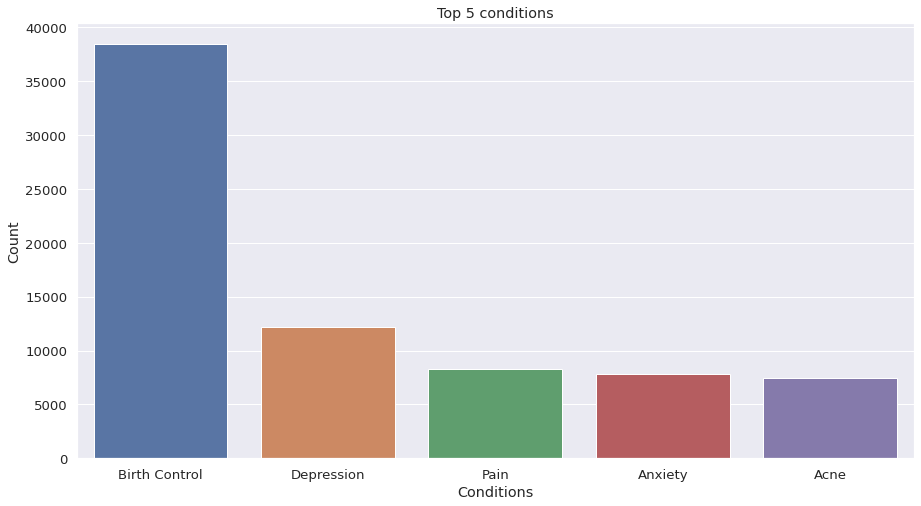

In [20]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]

con = dict(df_data.condition.value_counts()[:5])
fig = sns.barplot(list(con.keys()),list(con.values()))
fig.set_title("Top 5 conditions")
fig.set_xlabel("Conditions")
fig.set_ylabel("Count")

In [21]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10)

Levonorgestrel                       1883
Phentermine                          1079
Etonogestrel                          864
Varenicline                           662
Ethinyl estradiol / norethindrone     601
Escitalopram                          596
Clonazepam                            586
Alprazolam                            565
Sertraline                            550
Plan B                                527
Name: drugname, dtype: int64

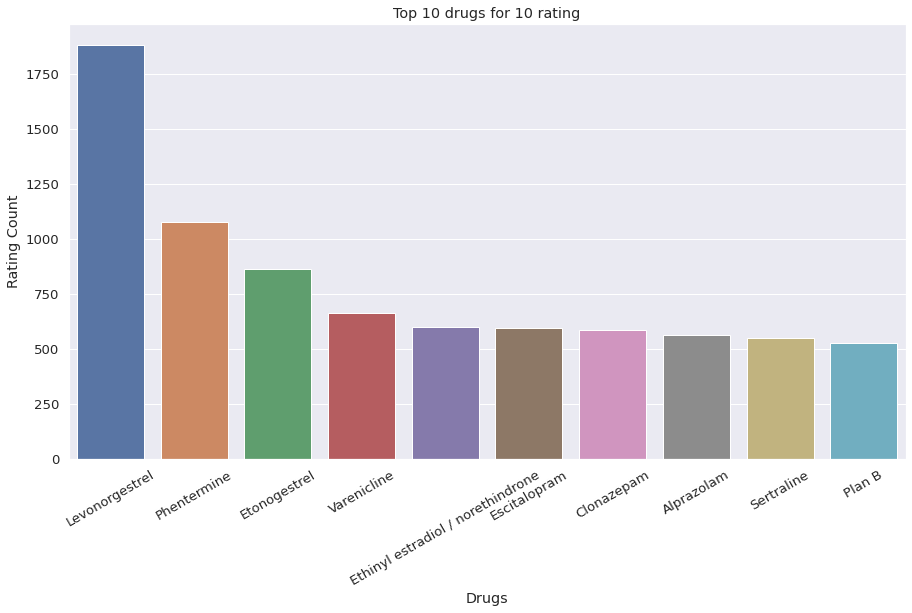

In [22]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 10 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

In [23]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

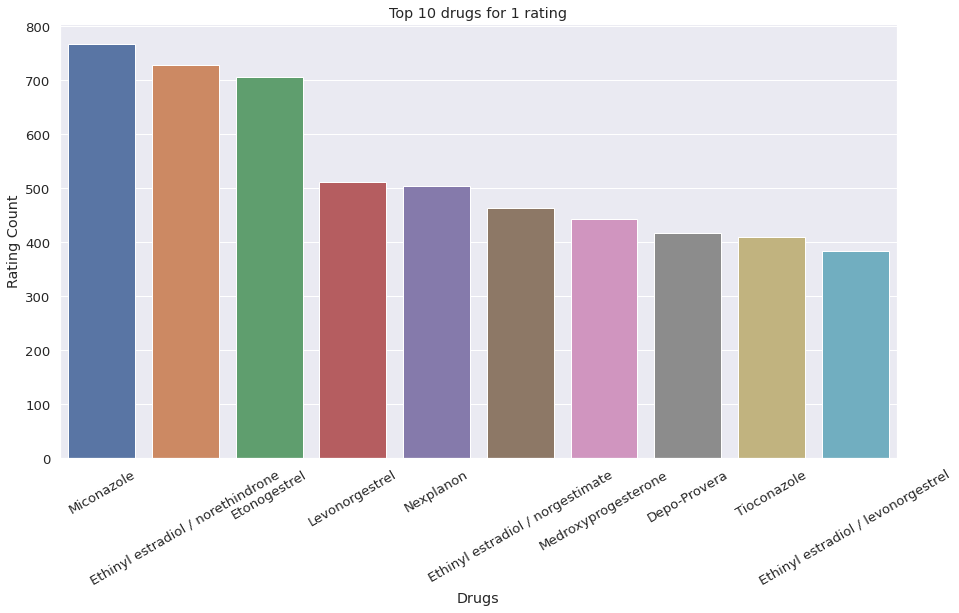

In [24]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 1 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

Correlation Plot

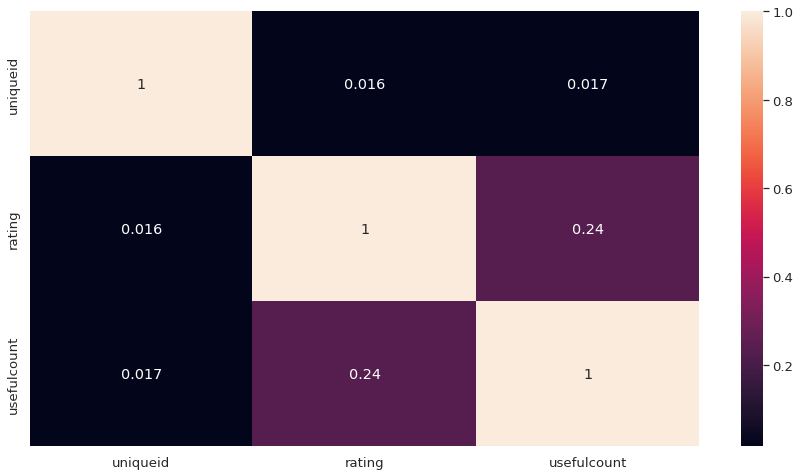

In [25]:
sns.heatmap(df_data.corr(),annot=True)

In [26]:
df_data.reset_index(drop=True,inplace=True)

(-0.5, 799.5, 499.5, -0.5)

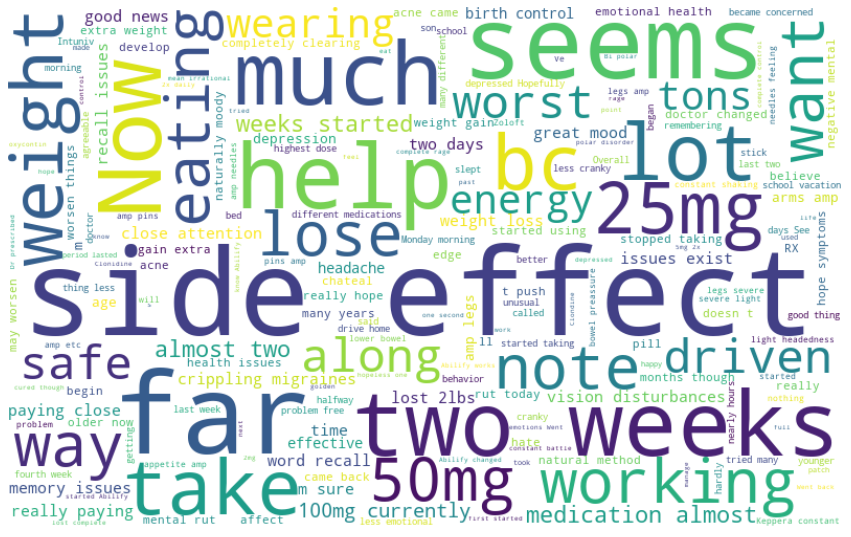

In [27]:
#word cloud for drugs with rating of 10
df_rate_ten = df_data.loc[df_data.rating, 'review']
K= (' '.join(df_rate_ten))

wordcloud = WordCloud(width=800, height=500,background_color='white').generate(K)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white')..generate(k)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

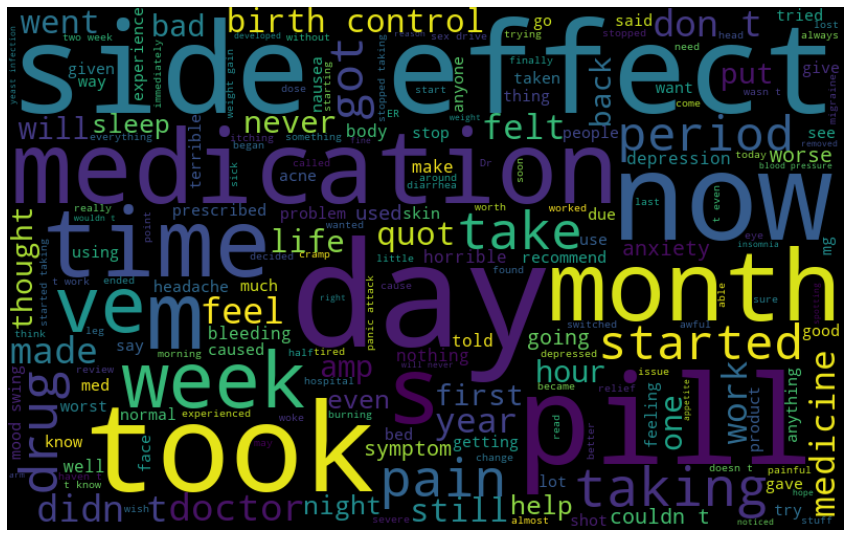

In [28]:
#word cloud for drugs with rating of 1
df_rate_one = df_data.loc[df_data.rating==1, 'review']
K1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width=800, height=500).generate(K1)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white'.generate(k))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

Text PreProcessing

In [ ]:
# #from nltk.corpus.reader.wordnet import Lemma
# #single function for preprocessing using spacy

# def normalize(comment, lowercase, remove_stopwords):
#   if lowercase:
#     comment = comment.lower()
#      comment = nlp(comment)
#   lemmatized = list()
#   for word in comment:
#     lemma = word.lemma_strip()
#     if lemma:
#       if not remove_stopwords or (remove_stopwords and lemma not in stops):
#         lemmatized.append(lemma)
#   return " ".join(lemmatized)

#  df_data['review_clean']=df_data['review'].apply(normalize, lowercase=True, remove_stopwords=True)

In [37]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print('No of rows with character with &#039', len(matched_list))

No of rows with character with &#039 0


converting the junk key words

In [38]:
df_data['review'] = df_data['review'].str.replace('&#039;',"'")

In [39]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print(len(matched_list))
matched_list

0


[]

In [40]:
import re
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re= re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#function to expand the contractions if any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Expanding Contractions in the reviews
df_data['review_clean']=df_data['review'].apply(expand_contractions)

In [41]:
#remove punctuation
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [42]:
#lowering case
df_data['review_clean'] = df_data['review_clean'].str.lower()

In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_data["review_clean"] = df_data["review_clean"].apply(lambda text: lemmatize_words(text))

In [ ]:
# count = 0
# def normalize_punc_lemmatize(text):
#   global count
#   count = count+1
#   #normalising by lowering case
#   text = text.lower()
#   #remove punctuation
#   text_p = "".join([char for char in text if char not in string.punctuation])
#   #lemmatizing text
#   doc = nlp(text_p)
#   #sen="".join([token.lemma_ ])
#   sen = " ".join([token.lemma_ if token.lemma_ != '-PRON-' else str(token) for token in doc])
#   #print(count)

# df_data['review_clean'] = df_data['review_clean'].apply(normalize_punc_lemmatize)


Tokenisation

In [46]:
def preprocess(text):
  
  #words = word_tokenize(text)
  words = word_tokenize(str(text))
  filtered_words = [word for word in words if word not in stop_words]
  final_string = " ".join(filtered_words)
  return final_string
df_data['review_clean'] = df_data['review_clean'].apply(preprocess)

Feature Engineering

In [47]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from textblob import TextBlob

In [49]:
df_data['review_clean'][100]

'ive latuda little 2 half year almost completely stopped psychotic symptom except still hear voice mainly try go sleep but no delusion paranoia drug take cogentin combination because cause shake lot main side effect experience include anhedonia shakiness jaw clenching inability sit still however im happy because actually work antipsychotic med tried not doesnt cause endless hunger experienced drug like saphris haldol zyprexa risperdal noted max daily dose 160mg'

In [50]:
text_blob_object = TextBlob(df_data['review'][100])
print(text_blob_object.sentiment)

Sentiment(polarity=0.07743055555555556, subjectivity=0.48819444444444454)


In [51]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df_data['sentiment_review'] = df_data['review'].apply(sentiment)

In [52]:
#from nltk.corpus.reader.reviews import Review
def find_pol(te):
    return TextBlob(te).sentiment.polarity

df_data['sentiment'] = df_data['review'].apply(find_pol)
df_data['sentiment_processed'] = df_data['review_clean'].apply(find_pol)

#df_data.head()

In [53]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_review,sentiment,sentiment_processed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,"(0.0, 0.0)",0.000000,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,"(0.16833333333333333, 0.43134920634920637)",0.168333,0.188021
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,"(0.06720959595959597, 0.40215488215488215)",0.067210,0.113636
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,"(0.17954545454545456, 0.6659090909090909)",0.179545,0.262500
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,"(0.19444444444444445, 0.40138888888888885)",0.194444,0.163333


In [ ]:
# # sentiment polarity
# def sentiment(te):
#   pol=[]
#   for i in df_data['review'].values:
#     analysis = TextBlob(i)
#     pol.append(analysis.sentiment.polarity)
#   return pol

#  # df_data['sentiment'] = df_data['review'].apply(sentiment) 
#   df_data['sentiment_processed'] = sentiment(df_data['review_clean'])
#   df_data['polarity'] = df_data['review'].apply(sentiment)
#   df_data['polarity2'] = df_data['review_clean'].apply(sentiment)
#   #df_data['polarity']= pol

In [54]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3483115],
       [0.3483115, 1.       ]])

In [55]:
np.corrcoef(df_data['sentiment'] ,df_data['rating'])

array([[1.       , 0.3483115],
       [0.3483115, 1.       ]])

In [56]:
np.corrcoef(df_data['sentiment_processed'],df_data['rating'])

array([[1.        , 0.35502465],
       [0.35502465, 1.        ]])

No much diff between in correlation btwn rating-revie and rating-cleaned review- no important data lost

In [57]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_review,sentiment,sentiment_processed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,"(0.0, 0.0)",0.000000,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,"(0.16833333333333333, 0.43134920634920637)",0.168333,0.188021
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,"(0.06720959595959597, 0.40215488215488215)",0.067210,0.113636
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,"(0.17954545454545456, 0.6659090909090909)",0.179545,0.262500
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,"(0.19444444444444445, 0.40138888888888885)",0.194444,0.163333


In [58]:
df_data['review'].iloc(0)

In [59]:
df_data['review_clean'].iloc[0]

'ha no side effect take combination bystolic 5 mg fish oil'

In [60]:
#word cound for each review
df_data['word_count'] = df_data["review_clean"].apply(lambda x: len(str(x).split()))

#unique word count
df_data['unique_word_count']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#puntuation count
df_data['punctuation_count']=df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#uppercase words count
df_data['upper_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title_case count
df_data['title_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#No of stopwrods
df_data['stopword_count']=df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#mean length of the words
#df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean(len(w) for w in str(x).split ))

#df_data['mean_word_len'] = df_data["mean_word_len"].fillna(0)


In [61]:
#mean length of the words
df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()] ))

In [62]:
df_data["mean_word_len"]=df_data['mean_word_len'].fillna(0)

In [63]:
label_encoder_drug = LabelEncoder()
label_encoder_condition = LabelEncoder()
df_data['drugname']=label_encoder_drug.fit_transform(df_data['drugname'])
df_data['condition']=label_encoder_condition.fit_transform(df_data['condition'])

In [64]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_review,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,"(0.0, 0.0)",0.000000,0.000000,11,11,3,1,6,6,4.272727
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,"(0.16833333333333333, 0.43134920634920637)",0.168333,0.188021,68,68,23,2,13,68,5.338235
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,"(0.06720959595959597, 0.40215488215488215)",0.067210,0.113636,78,78,30,6,15,57,5.166667
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,"(0.17954545454545456, 0.6659090909090909)",0.179545,0.262500,45,45,13,4,9,43,4.711111
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,"(0.19444444444444445, 0.40138888888888885)",0.194444,0.163333,63,63,20,7,15,61,6.111111


In [65]:
#Giving sentiments according ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [66]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_review,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,sentiment_rate
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,"(0.0, 0.0)",0.000000,0.000000,11,11,3,1,6,6,4.272727,1
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,"(0.16833333333333333, 0.43134920634920637)",0.168333,0.188021,68,68,23,2,13,68,5.338235,1
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,"(0.06720959595959597, 0.40215488215488215)",0.067210,0.113636,78,78,30,6,15,57,5.166667,0
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,"(0.17954545454545456, 0.6659090909090909)",0.179545,0.262500,45,45,13,4,9,43,4.711111,1
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,"(0.19444444444444445, 0.40138888888888885)",0.194444,0.163333,63,63,20,7,15,61,6.111111,1


Using all features to model

In [67]:
X_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['condition','rating','drugname','usefulcount','sentiment','sentiment_processed','word_count','unique_word_count','punctuation_count','upper_word_count','title_word_count','stopword_count','mean_word_len','sentiment_rate'])
X_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['condition','rating','drugname','usefulcount','sentiment','sentiment_processed','word_count','unique_word_count','punctuation_count','upper_word_count','title_word_count','stopword_count','mean_word_len','sentiment_rate'])

y_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])]['sentiment_rate']
y_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])]['sentiment_rate']

In [68]:
X_train.columns

Index(['condition', 'rating', 'drugname', 'usefulcount', 'sentiment',
       'sentiment_processed', 'word_count', 'unique_word_count',
       'punctuation_count', 'upper_word_count', 'title_word_count',
       'stopword_count', 'mean_word_len', 'sentiment_rate'],
      dtype='object')

In [69]:
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=1,
    num_leaves=200,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=1,
    verbose =-1,
    num_iterations=3000

)
model = clf.fit(X_train, y_train)

#predictions
predictions_ml = model.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test,predictions_ml), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test, predictions_ml),  '\n ')

print (classification_report(y_test,predictions_ml))

The accuracy of the model is  1.0 

The confusion matrix is 

[[16119     0]
 [    0 37352]] 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16119
           1       1.00      1.00      1.00     37352

    accuracy                           1.00     53471
   macro avg       1.00      1.00      1.00     53471
weighted avg       1.00      1.00      1.00     53471



In [70]:
xgb_clf = XGBClassifier()

model_xgb = xgb_clf.fit(X_train,y_train)

#predictions
predictions_xgb = model_xgb.predict(X_test)
print("The accuracy is : " ,  accuracy_score(y_test,predictions_xgb), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test, predictions_xgb),  '\n ')

print (classification_report(y_test,predictions_xgb))

The accuracy is :  1.0 

The confusion matrix is 

[[16119     0]
 [    0 37352]] 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16119
           1       1.00      1.00      1.00     37352

    accuracy                           1.00     53471
   macro avg       1.00      1.00      1.00     53471
weighted avg       1.00      1.00      1.00     53471



LR: 0.974619 (0.003929)
[[15302   817]
 [  488 36864]] 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16119
           1       0.98      0.99      0.98     37352

    accuracy                           0.98     53471
   macro avg       0.97      0.97      0.97     53471
weighted avg       0.98      0.98      0.98     53471

LDA: 0.999994 (0.000012)
[[16119     0]
 [    0 37352]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16119
           1       1.00      1.00      1.00     37352

    accuracy                           1.00     53471
   macro avg       1.00      1.00      1.00     53471
weighted avg       1.00      1.00      1.00     53471

KNN: 0.807036 (0.000644)
[[ 9380  6739]
 [ 3024 34328]] 

              precision    recall  f1-score   support

           0       0.76      0.58      0.66     16119
           1       0.84      0.92      0.88     37352

    accur

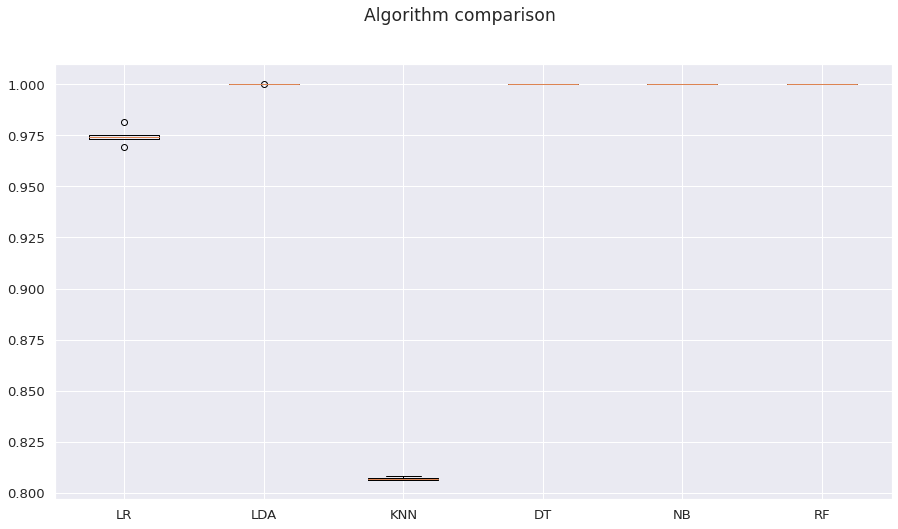

In [71]:
models= []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

#evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)
  m = model.fit(X_train,y_train)
  predictions_3 = m.predict(X_test)
  print(confusion_matrix(y_test,predictions_3), '\n')
  print(classification_report(y_test, predictions_3))
  #box plot algorithm comparison
fig= plt.figure()
fig.suptitle("Algorithm comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


**n_gram model building on review**

In [72]:
df_data.review_clean

0         ha no side effect take combination bystolic 5 ...
1         son halfway fourth week intuniv became concern...
2         used take another oral contraceptive 21 pill c...
3         first time using form birth control im glad we...
4         suboxone ha completely turned life around feel...
                                ...                        
213864    taken tamoxifen 5 year side effect severe swea...
213865    ive taking lexapro escitaploprgram since febru...
213866    im married 34 year old no kid taking pill wa h...
213867    wa prescribed nucynta severe neckshoulder pain...
213868                                                 work
Name: review_clean, Length: 213869, dtype: object

In [73]:
X_train_features = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['review_clean'])
X_test_features = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['review_clean'])
y_train_ngram = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['sentiment_rate'])
y_test_ngram = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['sentiment_rate'])

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range= (1,3),
                             max_features = 14 
                            )
vectorizer

TfidfVectorizer(max_features=14, min_df=2, ngram_range=(1, 3))

In [80]:
X_train_ngram = vectorizer.fit_transform(X_train_features['review_clean']).astype(float)
X_test_ngram = vectorizer.fit_transform(X_test_features['review_clean']).astype(float)
#%time X_test_ngram = vectorizer.fit.transform(X_test_features['review_clean']).astype(float)


In [ ]:
# y_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])]['sentiment_rate']
# y_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])]['sentiment_rate']

In [76]:
X_test_features.columns

Index(['review_clean'], dtype='object')

In [82]:
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=1,
    num_leaves=200,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=1,
    verbose =-1,
    num_iterations=150

)
predictions_ngrams =  clf.fit( X_train_ngram, y_train_ngram)

#predictions
predictions_ngrams = model.predict(X_test_ngram)
print("The accuracy of the model is ", accuracy_score(y_test_ngram,predictions_ngrams), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test_ngram, predictions_ngrams),  '\n ')

print (classification_report(y_test_ngram,predictions_ngrams))

The accuracy of the model is  0.30145312412335656 

The confusion matrix is 

[[16119     0]
 [37352     0]] 
 
              precision    recall  f1-score   support

           0       0.30      1.00      0.46     16119
           1       0.00      0.00      0.00     37352

    accuracy                           0.30     53471
   macro avg       0.15      0.50      0.23     53471
weighted avg       0.09      0.30      0.14     53471



In [83]:
X_test['ml_pred']= predictions_ml
X_test['ngrams_pred'] = predictions_ngrams

In [84]:
len(predictions_ml)

53471

In [85]:
df_test.shape

(53766, 7)

In [86]:
len(predictions_ngrams)

53471

Combining results from the models

In [87]:
X_test['final_pred']= (X_test['ml_pred']+X_test['ngrams_pred'])/2*X_test['usefulcount']

In [88]:
X_test.columns

Index(['condition', 'rating', 'drugname', 'usefulcount', 'sentiment',
       'sentiment_processed', 'word_count', 'unique_word_count',
       'punctuation_count', 'upper_word_count', 'title_word_count',
       'stopword_count', 'mean_word_len', 'sentiment_rate', 'ml_pred',
       'ngrams_pred', 'final_pred'],
      dtype='object')

In [89]:
X_test['drugname'] = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].drugname


In [90]:
drug_labels = X_test['drugname'].tolist()
condition_labels = X_test['condition'].tolist()
X_test.drugname = list(label_encoder_drug.inverse_transform(drug_labels))
X_test.condition = label_encoder_condition.inverse_transform(condition_labels)

In [109]:
X_test.head()

,condition,rating,drugname,usefulcount,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,sentiment_rate,ml_pred,ngrams_pred,final_pred
160398,Depression,10,Mirtazapine,22,0.000000,-0.300000,44,44,18,2,4,24,6.227273,1,1,0,11.0
160399,"Crohn's Disease, Maintenance",8,Mesalamine,17,0.566667,0.483333,31,31,9,0,4,20,4.548387,1,1,0,8.5
160400,Urinary Tract Infection,9,Bactrim,3,0.333333,0.333333,3,3,2,0,1,1,7.000000,1,1,0,1.5
160401,Weight Loss,9,Contrave,35,0.139063,0.253125,71,71,30,10,14,72,5.436620,1,1,0,17.5
160402,Birth Control,9,Cyclafem 1 / 35,4,0.260926,0.244216,77,77,13,10,17,75,5.025974,1,1,0,2.0


Drug name prediction

In [131]:
#con = input('enter a condition')
X_test.groupby('condition').get_group('Pain').sort_values('final_pred',ascending = False).drop_duplicates('drugname',keep='first').head(10)

,condition,rating,drugname,usefulcount,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,sentiment_rate,ml_pred,ngrams_pred,final_pred
185443,Pain,9,Oxycodone,695,0.102273,0.097273,44,44,37,1,9,36,6.000000,1,1,0,347.5
165471,Pain,9,OxyContin,695,0.102273,0.097273,44,44,37,1,9,36,6.000000,1,1,0,347.5
164988,Pain,10,Elavil,308,0.009722,0.039706,82,82,26,9,11,52,5.195122,1,1,0,154.0
170545,Pain,8,Tramadol,285,0.039689,0.058712,52,52,11,2,9,37,5.576923,1,1,0,142.5
195893,Pain,10,Amitriptyline,273,0.031190,0.080000,44,44,22,2,5,30,6.022727,1,1,0,136.5
197816,Pain,8,Gabapentin,266,0.058036,0.001786,40,40,9,4,4,19,5.000000,1,1,0,133.0
182846,Pain,9,Neurontin,262,0.012500,0.012500,21,21,5,2,4,18,4.809524,1,1,0,131.0
189549,Pain,10,Acetaminophen / hydrocodone,256,0.265476,0.226389,75,75,22,14,19,89,4.320000,1,1,0,128.0
180380,Pain,9,Ultram,221,-0.263750,-0.454688,66,66,16,16,19,66,5.378788,1,1,0,110.5
169207,Pain,10,Percocet,196,0.067500,0.011250,63,63,15,9,17,37,5.587302,1,1,0,98.0


In [127]:
#con = input('enter a condition')
#X_test.groupby('condition').get_group(con).sort_values('final_pred',ascending = False)
X_test.groupby('condition').get_group(con).sort_values('final_pred',ascending= False).drop_duplicates('drugname',keep='first').head(2)

KeyError: ignored

In [ ]:
X_test.head()